In [1]:
# EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
data_products = pd.read_csv('Products.csv')
data_transactions = pd.read_csv('Transactions.csv')
data_customers = pd.read_csv('Customers.csv')


In [3]:
data_customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
data_products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [5]:
data_transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [6]:
print(data_customers.info())
print(data_products.describe())
print(data_transactions.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


<ipython-input-7-4b09c1b56ae6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


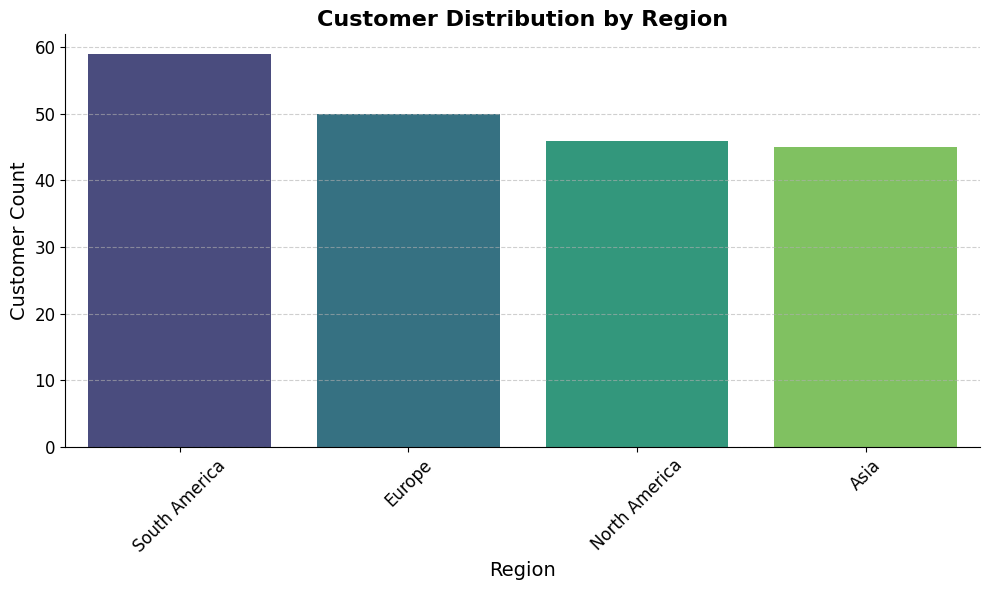

<ipython-input-7-4b09c1b56ae6>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


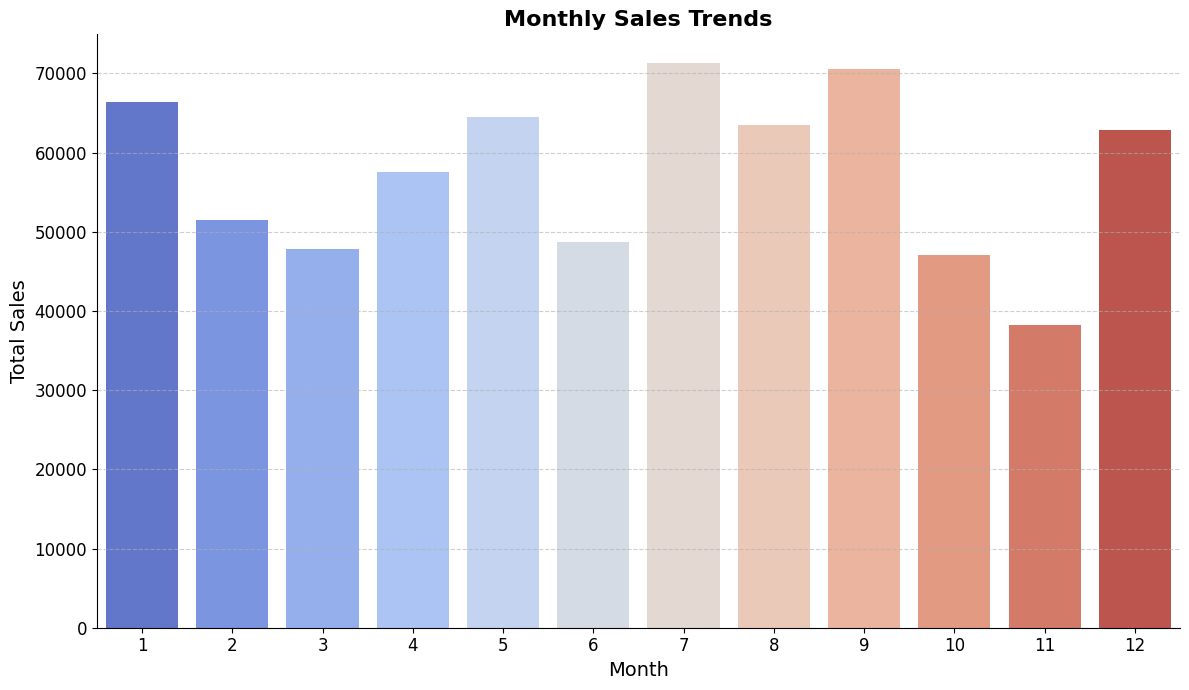

In [7]:

# Visualize customer distribution by region
plt.figure(figsize=(10, 6))
sns.countplot(
    data=data_customers,
    x='Region',
    palette='viridis',
    order=data_customers['Region'].value_counts().index
)
plt.title('Customer Distribution by Region', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=14)
plt.ylabel('Customer Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Analyze transaction trends
data_transactions['TransactionDate'] = pd.to_datetime(data_transactions['TransactionDate'])
data_transactions['Month'] = data_transactions['TransactionDate'].dt.month
monthly_sales = data_transactions.groupby('Month')['TotalValue'].sum()

plt.figure(figsize=(12, 7))
sns.barplot(
    x=monthly_sales.index,
    y=monthly_sales.values,
    palette='coolwarm'
)
plt.title('Monthly Sales Trends', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(ticks=range(0, 12), labels=[f'{i + 1}' for i in range(12)], fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


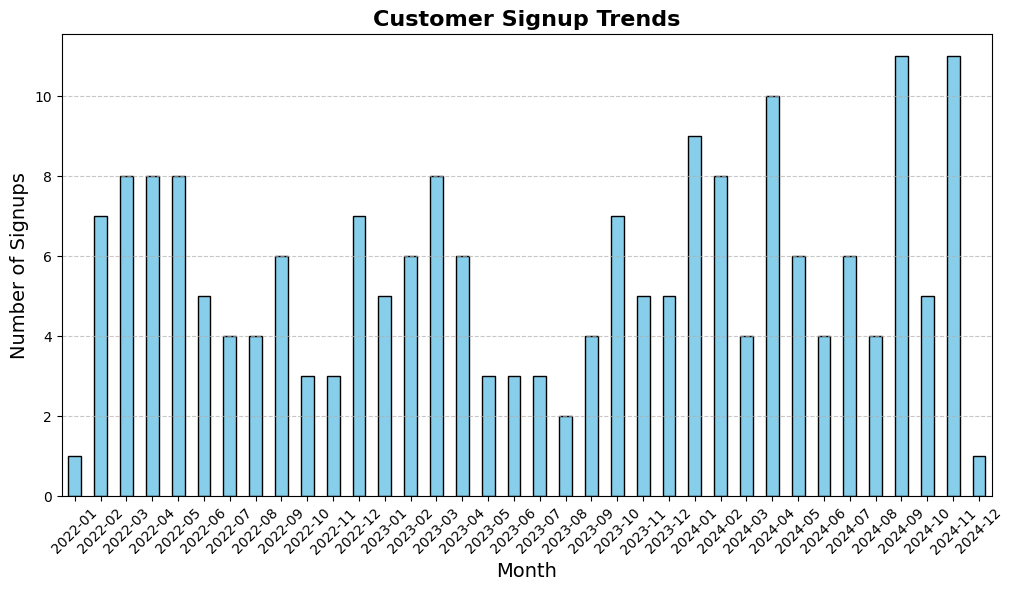

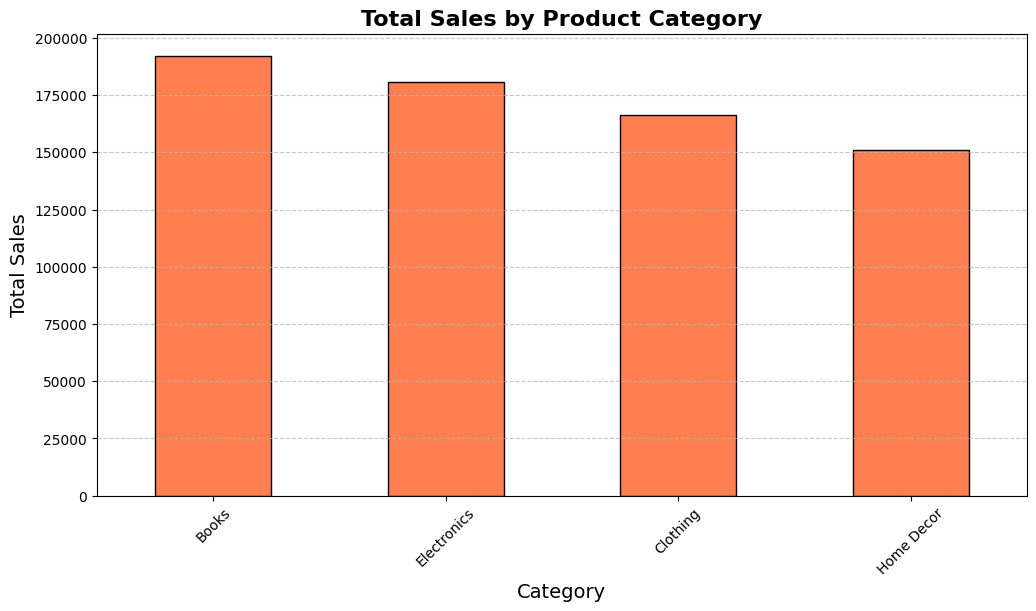

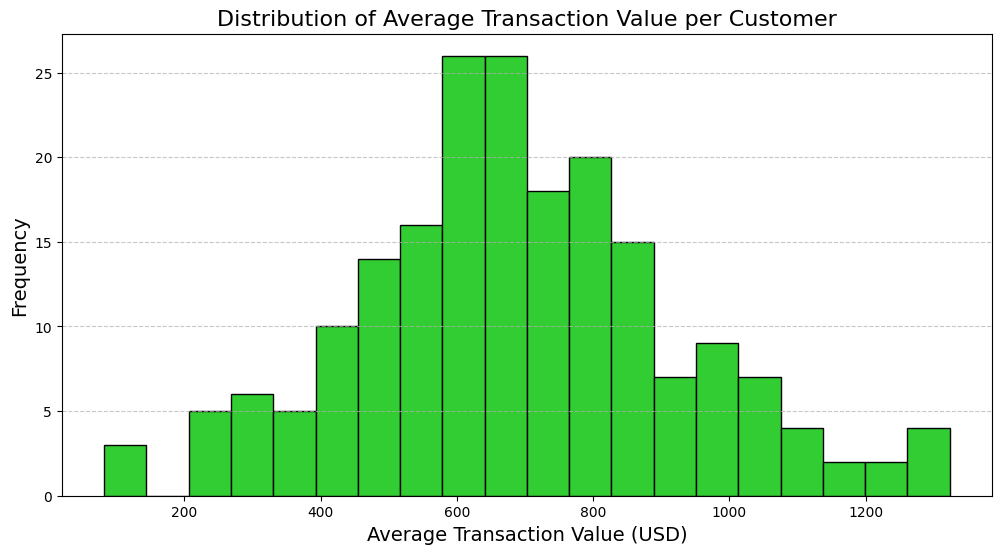

<ipython-input-9-4b45538220c3>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=repeat_customers.values, palette='Set2')


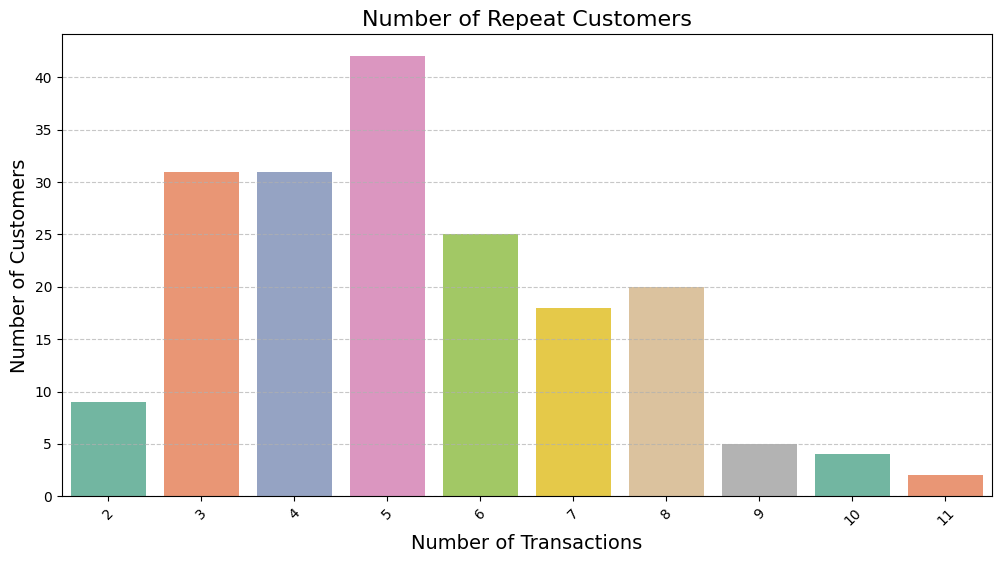

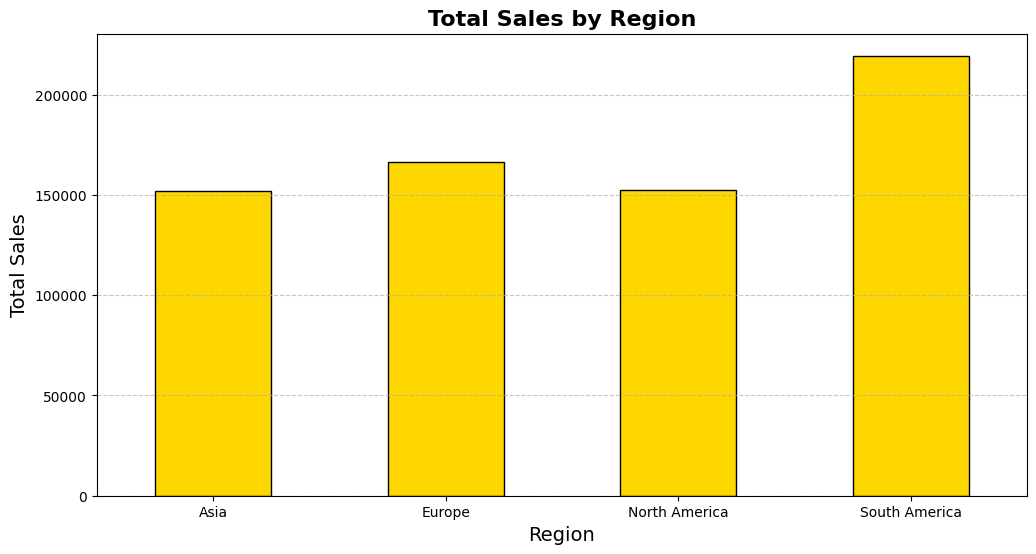

<ipython-input-9-4b45538220c3>:65: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data_transactions.resample('M', on='TransactionDate')['TotalValue'].sum()


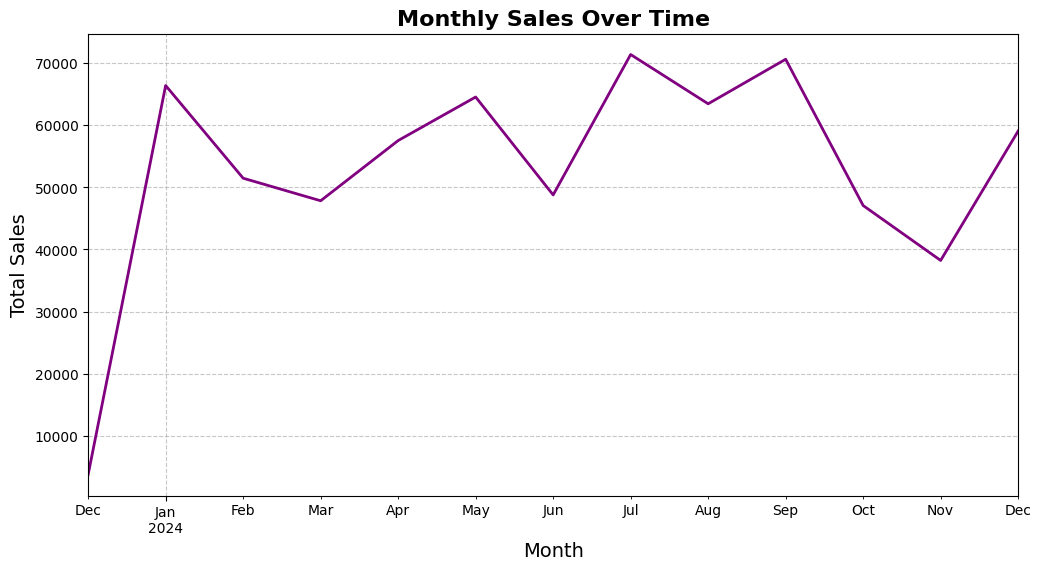

In [9]:
# 1. Customer Signup Trends
data_customers['SignupDate'] = pd.to_datetime(data_customers['SignupDate'])
data_customers['SignupMonth'] = data_customers['SignupDate'].dt.to_period('M')
signup_trends = data_customers['SignupMonth'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
signup_trends.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Customer Signup Trends', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Signups', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Product Category Analysis
product_sales = data_transactions.merge(data_products, on='ProductID')
category_sales = product_sales.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
category_sales.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Total Sales by Product Category', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Average Transaction Value
avg_transaction_value = data_transactions.groupby('CustomerID')['TotalValue'].mean()

plt.figure(figsize=(12, 6))
avg_transaction_value.plot(kind='hist', bins=20, color='limegreen', edgecolor='black')
plt.title('Distribution of Average Transaction Value per Customer', fontsize=16)
plt.xlabel('Average Transaction Value (USD)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Customer Retention Analysis
repeat_customers = data_transactions['CustomerID'].value_counts()
repeat_customers = repeat_customers[repeat_customers > 1]

plt.figure(figsize=(12, 6))
sns.countplot(x=repeat_customers.values, palette='Set2')
plt.title('Number of Repeat Customers', fontsize=16)
plt.xlabel('Number of Transactions', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 5. Sales by Region
sales_by_region = data_transactions.merge(data_customers, on='CustomerID').groupby('Region')['TotalValue'].sum()

plt.figure(figsize=(12, 6))
sales_by_region.plot(kind='bar', color='gold', edgecolor='black')
plt.title('Total Sales by Region', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 6. Time Series Analysis
monthly_sales = data_transactions.resample('M', on='TransactionDate')['TotalValue'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(color='purple', linewidth=2)
plt.title('Monthly Sales Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

